# Lab II - Clustering
## Machine Learning II

Student: Alejandro Martínez Henández

CC: 1035877060

Email: alejandro.martinezh@udea.edu.co

## 1. Research about the Spectral Clustering method, and answer the following questions:

### a. In which cases might it be more useful to apply?

Spectral clustering (SC) helps identify groups or clusters within a dataset (similar to K-means) by analyzing the relationships between data points based on their similarities. It is important to mention that SC can handle clusters that are not spherical, are not evenly distributed around a center point and may have irregular shapes, making it suitable for complex datasets with non-linearly separable data (a limitation for K-means).

Some of the uses
- Image segmentation: where you need to group pixels not just based on color similarity but also considering the pixel connectivity to segment different objects within an image, regardless of their shape.
- Gene expression data analysis: by considering the relationships between genes (e.g., co-expression or functional similarity), can identify biologically relevant groups or pathways that might be missed by other approaches


### b. What are the mathematical fundamentals of it? AND c. What is the algorithm to compute it?

First, let's understand the algorithm. It starts by modeling the data as a graph, where data points are nodes connected based on their similarity. The goal is to partition this graph in a way that minimizes the connections (edges) between different groups while maximizing the connections within the same group.

To achieved the goal, there are many steps that are explained next (supposing we are working with nummerical data):

1. ***Calculate a similarity graph:*** Could be done callculating the euclidean distance of the data. Each data point becomes a node in the graph. Edges between nodes are then weighted based on the calculated similarities, with stronger connections representing more similar items.

2. ***Calculating the Laplacian Matrix:*** This step transforms the similarity graph into a matrix that highlights which nodes (data points) are more closely related to each other.

3. ***Find Eigenvalues and Eigenvectors of Laplacian:*** The eigenvalues tell us about the "importance" of their corresponding eigenvectors in representing the graph's structure.

4. ***Selecting Eigenvectors Based on the Smallest Non-Zero Eigenvalues:*** The smallest non-zero eigenvalues (and their corresponding eigenvectors) capture the most significant structure of the data with the least amount of noise. Honestly, I wasn't able to understand exactly why.

5. **Projecting Data into Lower-Dimensional Space:** The selected eigenvectors are used to transform the high-dimensional to a lower one. This step simplifies the data, making it easier to identify clusters.

6. **Applying Traditional Clustering Techniques:** With the data now in a simpler form, algorithms like k-means can more accurately group the data points into clusters.

## d. Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

Yes, it holds relation with the PCA method.
In spectral clustering, the smallest non-zero eigenvalues of the laplacian matrix are sought because they reveal the most significant cluster structures with minimal distortion, focusing on separating the graph into distinct subgraphs. PCA, sought the biggest eigenvalues in the covariance matrix, aiming to maximize variance and retain the most significant features of the data.


## 2. Research about the DBSCAN method, and answer the following questions:

### a. In which cases might it be more useful to apply?
DBSCAN is useful in scenarios where the data has an irregular shape or when there's a significant amount of noise (like outliers).

Some areas where it could be used:
- Geospatial Data Analysi
- Anomaly Detection
- Market Segmentation
- Image Segmentation (object detection)


### b. What are the mathematical fundamentals of it?

In general terms, the method "draws a circle" (with radius $\epsilon$ that we must choose) around every point of data we have. Then it counts all the other points that is touching it. With this information the algorithm categorizes points as core-points, border-points, or noise-points. With the core-points that are touching each, it starts to create clusters. If a core-point touches a non-corepoint this will be the border of the cluster (border points). Any other point left that is not touched by a core-point is left out of the cluster (outliers or noise).

Let's assume the dataset is represented as a matrix A, where each row corresponds to a data point in a multidimensional space.

1. We Calculate the distances between each point in the dataset. This can be represented as a distance matrix D, where $D_{ij}$ is the distance between points $i$ and $j$. The Euclidean distance between two points $x_i$ and $x_j$ in an n-dimensional space is calculated as:

$$D_{ij} =\sqrt{\sum_{k = 1}^{n} (x_{ik} - x_{jk})^2 }$$


2. For each point, identify all other points within a radius, $\epsilon$ forming its $\epsilon$-neighborhood. Mathematically, if $D_{ij} < \epsilon$, then point $j$ is in the ε-neighborhood of point i.

3. A point $i$ is considered a core-point if its ε-neighborhood contains at least $min_{samples}$ points (it means, if the point has a minimum number of neighbours define by ourselves). Formally, if the number of points in $i$'s $\epsilon$-neighborhood, including $i$ itself, is greater than or equal to  $min_{samples}$, it's a core point.

4. Cluster Initiation: Start with a random core-point that hasn't been assigned to a cluster. Create a new cluster and add this core point to it.

5. Cluster Expansion: Add to the cluster every other core-point that is part of the first one's $\epsilon$-neighborhood. keep repeating the process with all the new core-point that adds to the cluster.

6. Points that are not core but are within the ε-neighborhood of a core point in the cluster are added as border points to the cluster. This are border-points.

7. Any point that is not a core point and not density-reachable from any core point in any cluster is marked as noise.

9. If there is a buch of core_points that are not connected to the inicial clluster, let's start another cluster and repeat the process.



### c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

Apart from both being clustering methods, there are many others similarities.

- Use of Similarity Measures: Both methods start by defining some measure of similarity or connectivity between data points. In DBSCAN, the ε-neighborhood and the $min_{samples}$ points threshold, which are used to identify dense regions of data points. Spectral Clustering uses the similarity graph and its Laplacian to understand the global structure of the data.

- Emphasis on Data Density: Both algorithms aim to identify clusters based on the density of data points.

- Flexibility in Handling Non-linear Structures: Both methods are well-suited for clustering data that is not linearly separable.

- Identification of Clusters without Pre-specifying the Number (almost): DBSCAN does not require the number of clusters to be specified in advance. Spectral Clustering needs this number, BUT can leverage the eigenvalues of the Laplacian to suggest a natural clustering of the data.

## 3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

When we are applying K-means or other clustering methods we need to know before hand  the number of clusters. The elbow method is a visual way to determine the "optimal" number of clusters for a dataset.

We plot the number of clusters on the x-axis and some measure of clustering quality (like the sum of squared distances from points to their cluster centers) on the y-axis. The method says that there will be a point where if we increase the number of  clusters, the measure of cluster quality will change dramatically assimilating an elbow. The point where this happens is the "optimal" number of clusters.

Image Source: [machinelearninginterview](https://machinelearninginterview.com/topics/machine-learning/how-to-find-the-optimal-number-of-clusters-in-k-means-elbow-and-silhouette-methods/)


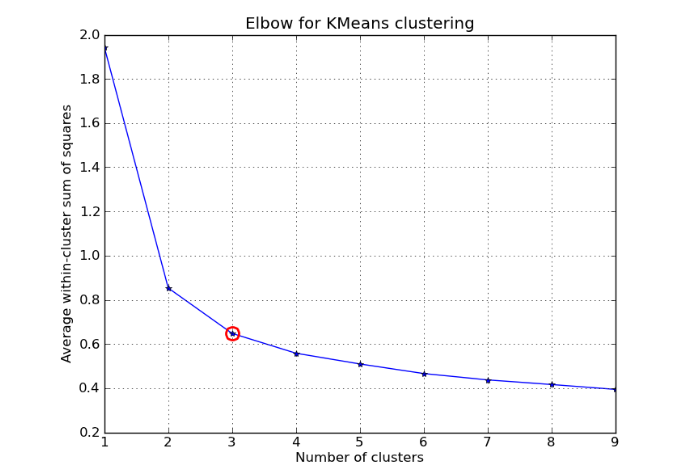

Even if it is a simple method, identifying a clear "elbow" in the plot is frequently ambiguous (mostly subjective), leading to inconsistent determinations of the cluster count, thus unreliable. Other approaches like the variance-ratio criterion or average silhouette width are deemed more reliable.








## 4. Remember the unsupervised Python package you created in the previous unit? 😀It’s time for an upgrade.

You can check the update in the folder "usupervised". This time I did my best to organize the code following the API of Scikit-Learn and also the PEP8.

I wanted to mention that I also commented properly (as i saiid following the PEP8) the previous modules of PCA and SVD. This modules are not used in this work, but it helps to improve the work's presentation. 

## 5. Let’s use the newly created modules in unsupervised to cluster some toy data.

### a. Use the following code snippet to create scattered data X

In [87]:
from sklearn.datasets import make_blobs

# Generate synthetic dataset for clustering
X, y = make_blobs(
    n_samples=500,  # Number of data points to generate
    n_features=2,   # Number of features for each sample (2D in this case)
    centers=4,      # Number of centers to generate, or fixed center locations
    cluster_std=1,  # Standard deviation of the clusters
    center_box=(-10.0, 10.0),  # Bounding box for each cluster center
    shuffle=True,  # Shuffle the samples
    random_state=1,  # Seed for random number generation for reproducibility
)

### b. Plot the resulting dataset. How many clusters are there? How far are they from one another?

In the graph below we can identify at least 4 cluster. Three clusters are grouped very close to each other in the lower left corner and the remaining one is in the upper right corner.

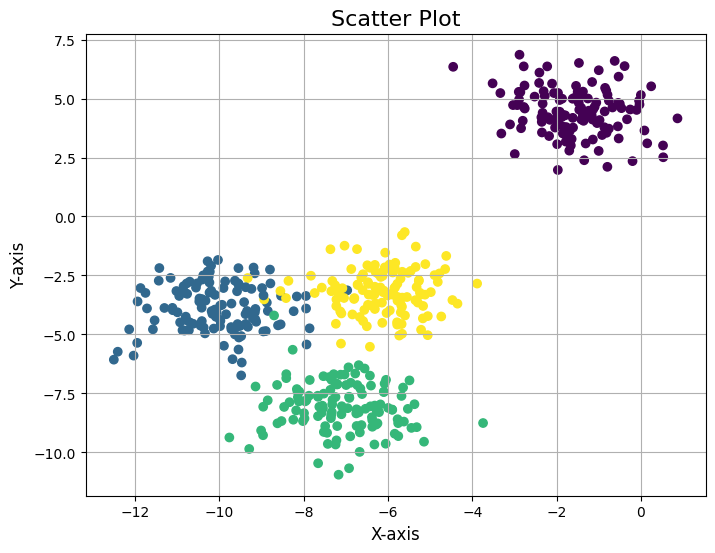

In [82]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Add a grid in the background
plt.grid(True)

# Set plot title and labels
plt.title('Scatter Plot', fontsize=16)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)

# Show the plot
plt.show()

### c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

Before starting, it is important to remember that the silhouette plots and its coefficients are calculated in the following way:
$$ $$

$For \space any \space point \space of \space data \space i:$

$$ s(i) = \frac{b(i)-a(i)}{max(a,b)} $$
$a(i) = Average \space distance \space of \space point \space i \space to \space all \space the \space points \space in \space the \space same \space cluster$

$b(i) = Average \space distance \space of \space point \space i \space to \space all \space the \space points \space in \space the \space nearest \space neighbor \space cluster$

$$ $$

So, we could say that the ideal value for silhouette coefficient is 1 and the worst is -1. 

**It's important to mention that according to the previous equation, we can not calculate the silhouette plot and its coefficient if the number of clusters are less than 2**

Another point to discuss and to keep in mind before analizing the results is how we select the centroid in the first iteration and how many iterations we are going to perform.

In order to save resources, the constructor of the class initialized the module with only 100 iterations as seen below. 

```
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        ...
```

Also for the module of K-means (kmean.py in *unsupervised* package) we are selecting the first centroids randomly. This causes that almost every time you run the code, it will display different results. It could be solve selecting one seed (not ideal) or using other methods to select the first centroid. 
```
def initialize_centroids(self, data):
        """Randomly selects `n_clusters` data points as initial centroids."""
        indices = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        self.centroids = data[indices]
```

### Silhouette for Kmeans and  coefficients

For n_clusters = 2, the average silhouette_score is : 0.7049787496083262
For n_clusters = 3, the average silhouette_score is : 0.5882004012129721
For n_clusters = 4, the average silhouette_score is : 0.6505186632729437
For n_clusters = 5, the average silhouette_score is : 0.5745566973301872


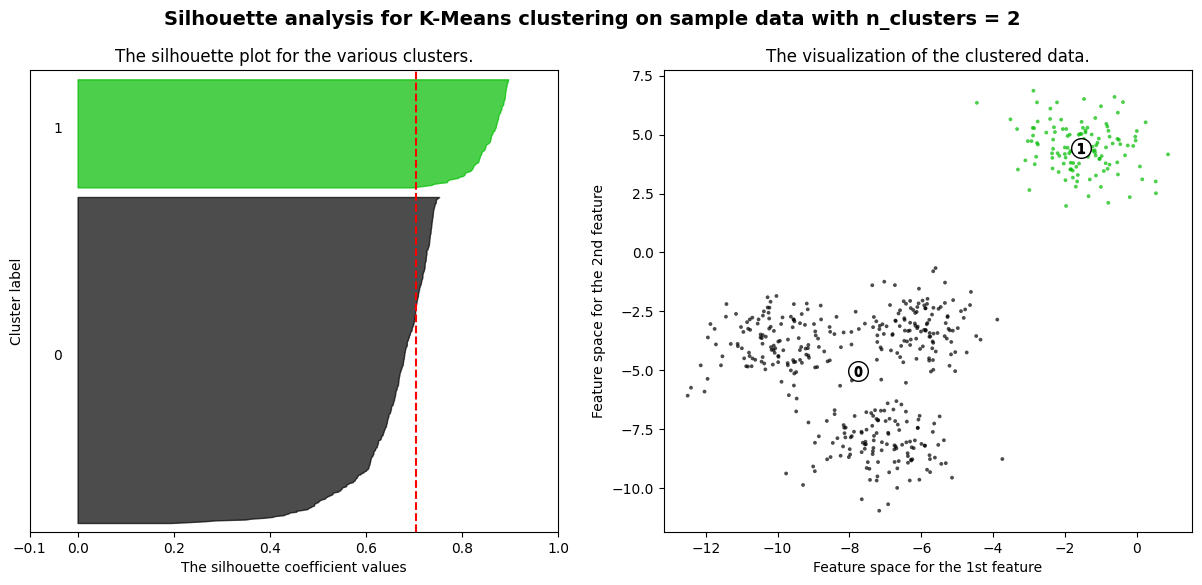

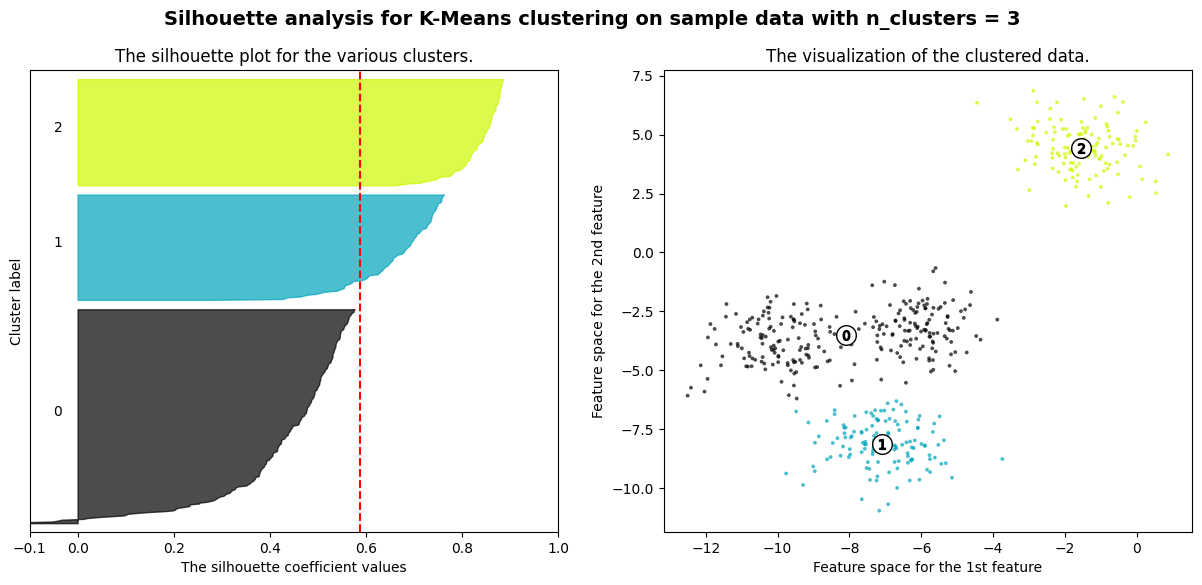

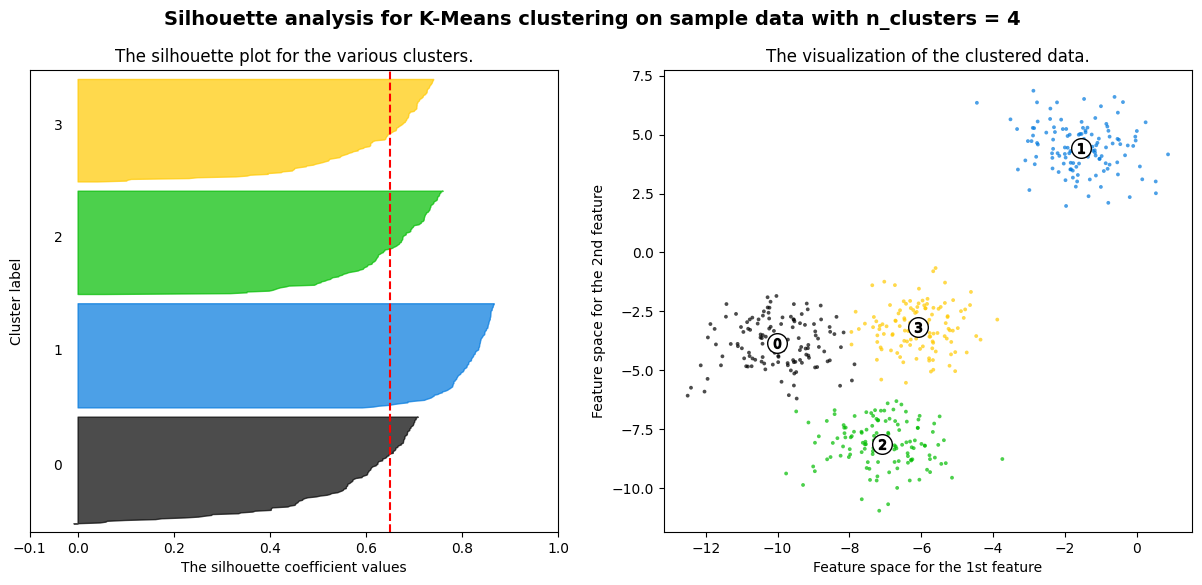

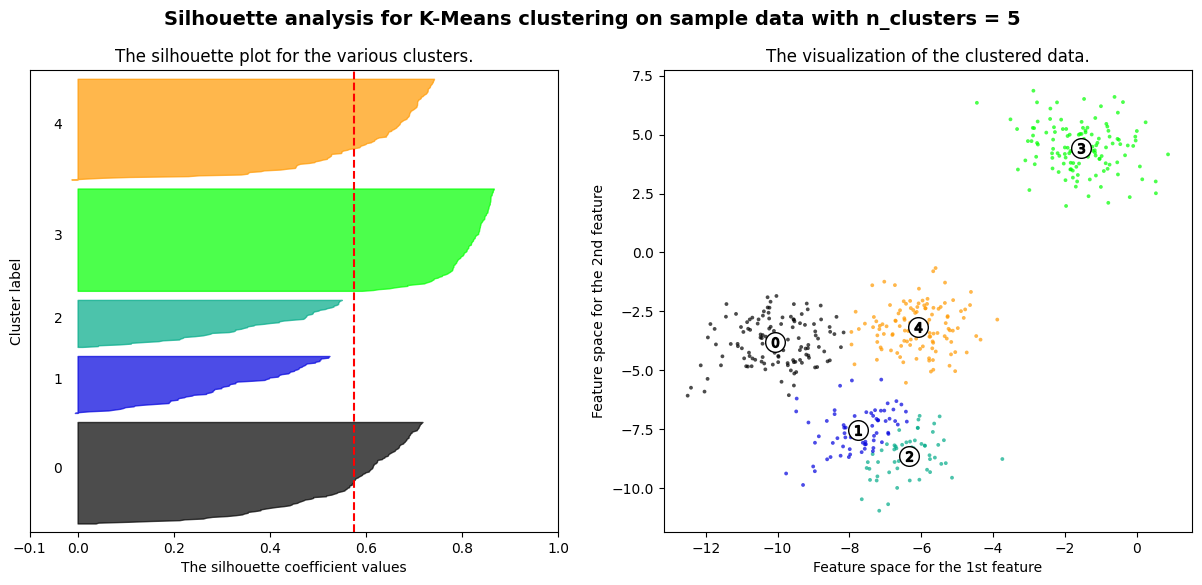

In [83]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from unsupervised.clustering.kmean import KMeans 

# The data for this code was generated in the point 5.a.
# Please be sure to run that cell before this one

range_n_clusters = [2, 3, 4, 5]  # Range of cluster numbers to evaluate

for n_clusters in range_n_clusters:
    # Setting up the subplot configuration
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)
    
    # Configuring the silhouette plot (ax1)
    ax1.set_xlim([-0.1, 1])  # Silhouette coefficient range
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  # Space for silhouettes
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Calculate and print the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    
    # Calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10  # Initial lower bound for plotting silhouettes
    for i in range(n_clusters):
        # Aggregate and sort silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # Cluster labels
        
        y_lower = y_upper + 10  # Adjust y_lower for next plot
    
    # Configuring and annotating the silhouette plot (ax1)
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")  # Avg silhouette score
    ax1.set_yticks([])  # Clear y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Configuring the cluster visualization plot (ax2)
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    # Plotting cluster centers
    centers = kmeans.centroids
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(f"Silhouette analysis for K-Means clustering on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')
    
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.7049787496083262
For n_clusters = 3, the average silhouette_score is : 0.5640395813218549
For n_clusters = 4, the average silhouette_score is : 0.6505186632729437
For n_clusters = 5, the average silhouette_score is : 0.530757290381893


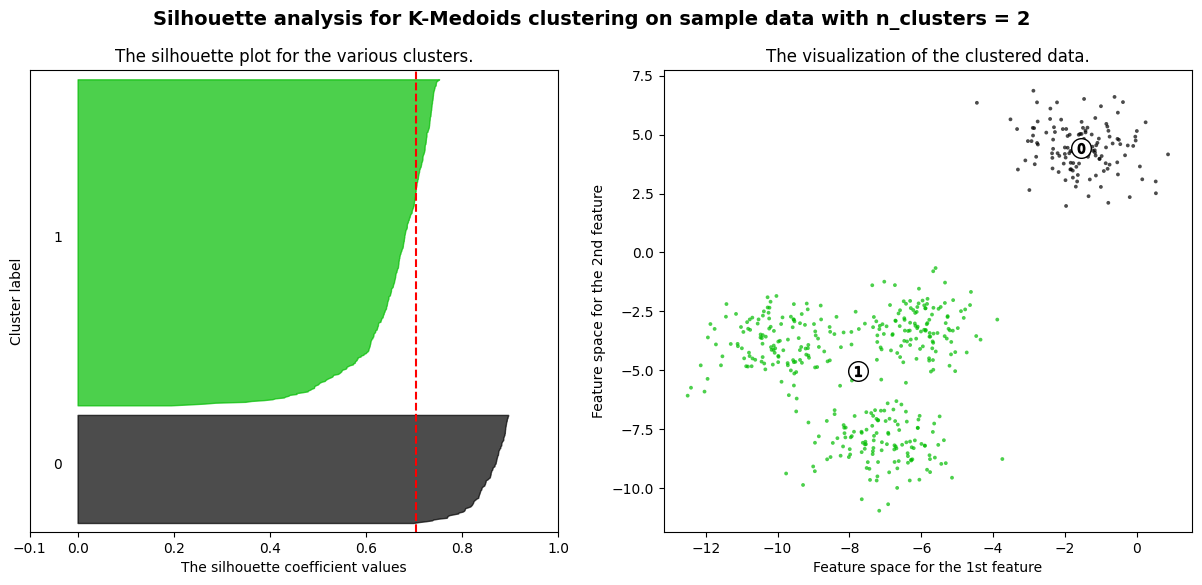

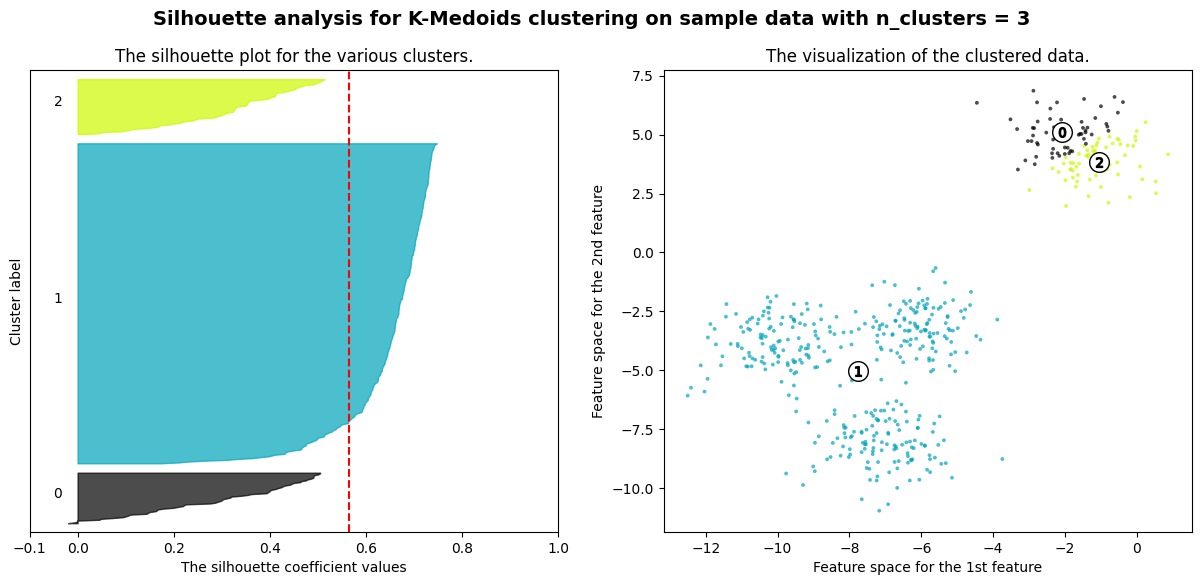

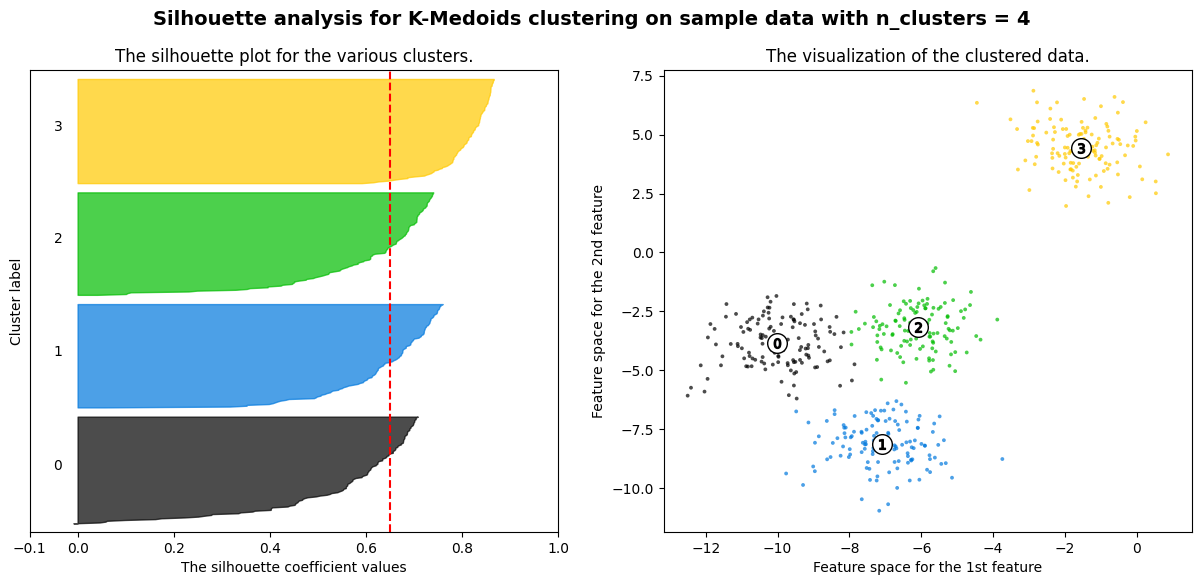

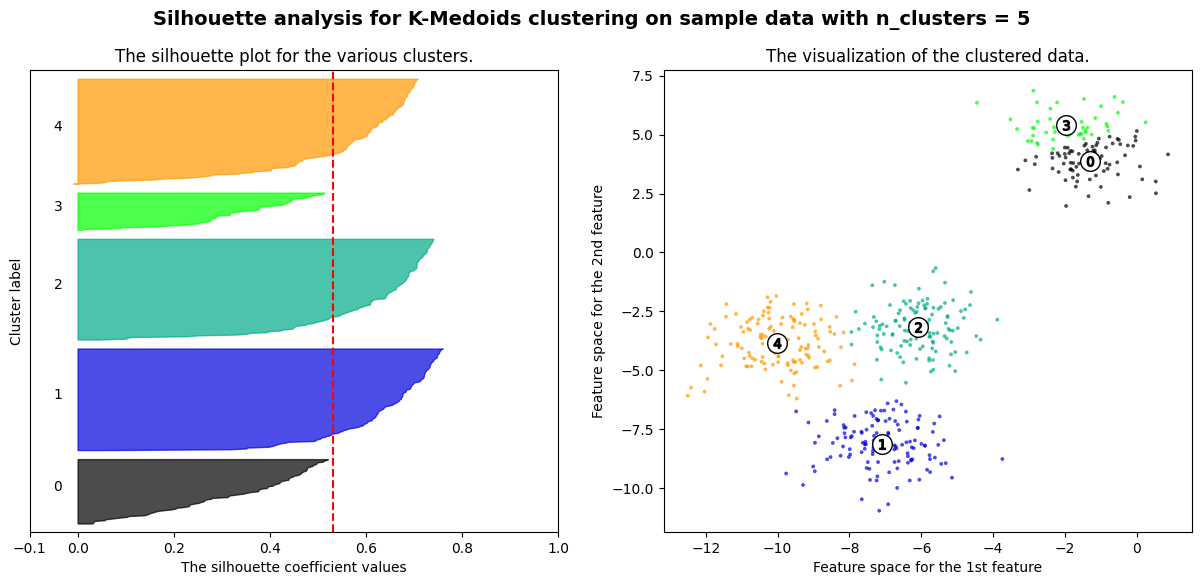

In [89]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from unsupervised.clustering.kmedoids import KMedoids

# The data for this code was generated in the point 5.a.
# Please be sure to run that cell before this one

range_n_clusters = [2, 3, 4, 5]  # Range of cluster numbers to evaluate

for n_clusters in range_n_clusters:
    # Setting up the subplot configuration
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)
    
    # Configuring the silhouette plot (ax1)
    ax1.set_xlim([-0.1, 1])  # Silhouette coefficient range
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  # Space for silhouettes
    
    # K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters)
    kmedoids.fit(X)
    cluster_labels = kmedoids.labels_
    
    # Calculate and print the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    
    # Calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10  # Initial lower bound for plotting silhouettes
    for i in range(n_clusters):
        # Aggregate and sort silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # Cluster labels
        
        y_lower = y_upper + 10  # Adjust y_lower for next plot
    
    # Configuring and annotating the silhouette plot (ax1)
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")  # Avg silhouette score
    ax1.set_yticks([])  # Clear y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Configuring the cluster visualization plot (ax2)
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    # Plotting cluster centers
    centers = kmedoids.medoids
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(f"Silhouette analysis for K-Medoids clustering on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')
    
plt.show()


### d. What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?

Making it easier for the reader, here is a table with the results sorted by the silhouette score. 

| \# Clusters | K-means            | K-medoids          |
| ----------- | ------------------ | ------------------ |
| 2           | 0.7049787496083262 | 0.7049787496083262 |
| 3           | 0.5882004012129721 | 0.5640395813218549 |
| 4           | 0.6505186632729437 | 0.6505186632729437 |
| 5           | 0.5745566973301872 | 0.530757290381893  |

The results for both methods are almost identical except when working with 3 and 5 clusters. 

Here we can see that the best result for both methods is the one with only two clusters. The reason is simple when visualizing the data: A group of data is far away from the rest, but if a human were chosen to select the clusters, maybe their response would be similar to the one generated with 4 clusters, that is also the second best result in terms of the silhouette score.

Honestly, I was expecting the result with 4 clusters to be the best, but it makes sense to be the second. Of course this is only raw data without a context behind, but in a real life scenario the final *$K$* must be selected taking into account the bussiness needs. 

## 6. Use the following code snippet to create different types of scattered data:


### a. Plot the different datasets in separate figures. What can you say about them?



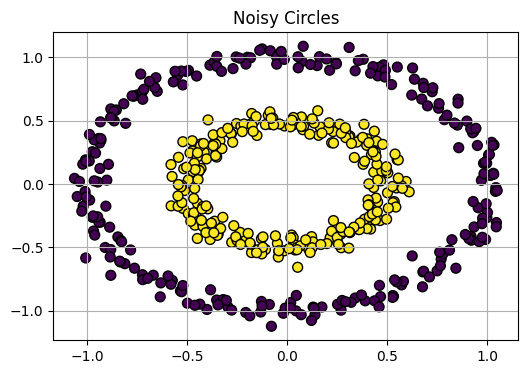

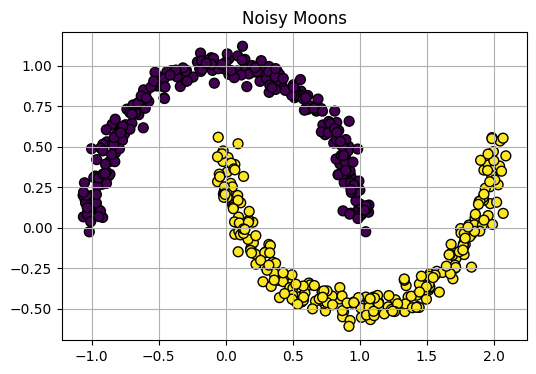

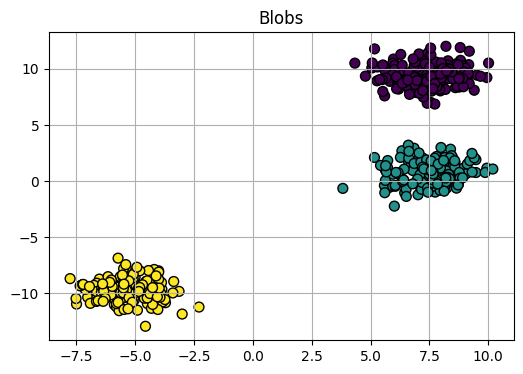

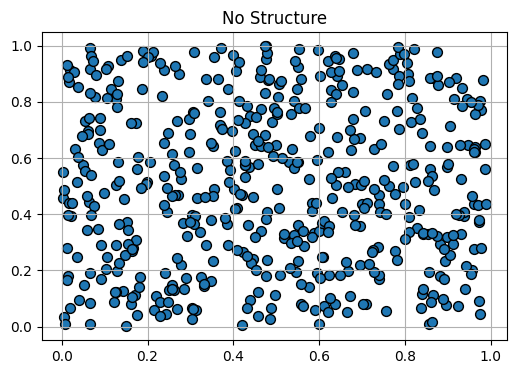

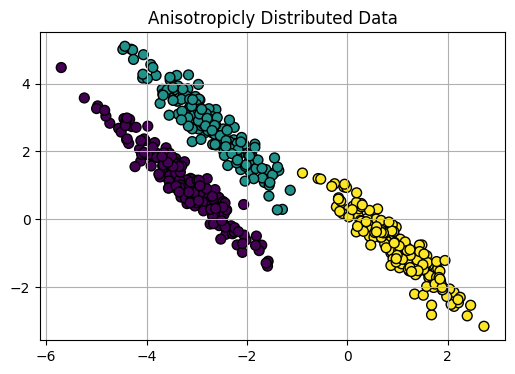

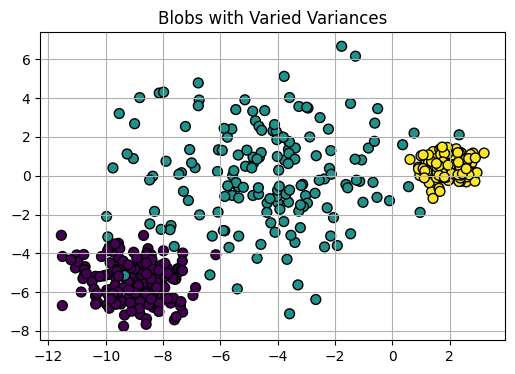

In [94]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings


# ========
# Dataset Generation
# ========
# Purpose: To generate various synthetic datasets for clustering analysis.
# The datasets vary in shape and complexity to test the scalability and effectiveness
# of clustering algorithms under different conditions.

n_samples = 500  # Number of samples for each dataset

# Generate noisy circular data
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Generate noisy crescent-shaped (moons) data
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# Generate blob data with a random state for reproducibility
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# Generate data with no specific structure
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
# Purpose: To demonstrate the effect of data transformation on clustering.
random_state = 170  # Random state for reproducibility
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]  # Transformation matrix
X_aniso = np.dot(X, transformation)  # Apply transformation
aniso = (X_aniso, y)  # Anisotropic dataset

# Blobs with varied variances
# Purpose: To test clustering algorithms' ability to handle clusters of different densities.
varied = datasets.make_blobs(
    n_samples=n_samples, 
    cluster_std=[1.0, 2.5, 0.5],  # Standard deviations of the clusters
    random_state=random_state
)

# ========
# Plotting the data generated
# ========

# Ignore some warnings
warnings.filterwarnings("ignore")

# Plotting function for the datasets
def plot_dataset(X, y, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot each dataset with an appropriate title
plot_dataset(noisy_circles[0], noisy_circles[1], "Noisy Circles")
plot_dataset(noisy_moons[0], noisy_moons[1], "Noisy Moons")
plot_dataset(blobs[0], blobs[1], "Blobs")
plot_dataset(no_structure[0], no_structure[1], "No Structure")
plot_dataset(aniso[0], aniso[1], "Anisotropicly Distributed Data")
plot_dataset(varied[0], varied[1], "Blobs with Varied Variances")


### b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

Let's create some funtions to cluster and then graph the results of the models. 

In [177]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt


def graphs(X, labels, title, method):
    """
    Plots the results of a clustering algorithm.
    
    Parameters:
    - X: Input data.
    - labels: Cluster labels for the data points.
    - title: Descriptive title for the plot.
    - method: Name of the clustering method used.
    """
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
    plt.title(f"{method} on {title}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def kmean_op(X, num_cluster, title, method="K-Means"):

    """
    Applies K-Means clustering to a dataset and visualizes the resulting clusters.

    This function performs K-Means clustering on a given dataset `X` with a specified 
    number of clusters `num_cluster`. It then plots the clustered data using matplotlib, 
    labeling the plot with a provided title and indicating the clustering method used.

    Parameters:
    - X : array-like or matrix of shape (n_samples, n_features)
        The input data to cluster. Each row corresponds to a single data point, and 
        each column represents a feature.

    - num_cluster : int
        The number of clusters to form as well as the number of centroids to generate. 
        It determines the number of clusters K for the K-Means algorithm.

    - title : str
        The title of the plot. This should describe the dataset or the purpose of the 
        clustering operation. The title will be displayed above the plotted data.

    Side Effects:
    - A scatter plot of the clustered data is displayed using matplotlib, with data points 
      colored according to their assigned cluster. The plot includes the title and 
      indicates the use of K-Means for clustering.

    Returns:
    - None: This function does not return any values. Its primary purpose is to perform 
      clustering and visualize the results.
    """


    kmeans = KMeans(n_clusters=num_cluster, random_state=0)
    kmeans.fit(X) #Fit the model to your data
    labels = kmeans.predict(X) # Predict the cluster labels for each data point
    centers = kmeans.cluster_centers_ # Retrieve the cluster centers
    centers = kmeans.cluster_centers_ # Retrieve the cluster centers
    graphs(X, labels, title, method) # Plotting the data and centroids


def kmedoids_op(X, num_cluster, title, method="K-Medoids"):
    """
    Apply K-Medoids clustering and plot the results.
    
    Parameters:
    - X : array-like or matrix of shape (n_samples, n_features)
        The input data to cluster. Each row corresponds to a single data point, and 
        each column represents a feature.

    - num_cluster : int
        The number of clusters to form as well as the number of centroids to generate. 
        It determines the number of clusters K for the K-Means algorithm.

    - title : str
        The title of the plot. This should describe the dataset or the purpose of the 
        clustering operation. The title will be displayed above the plotted data.

    Side Effects:
    - A scatter plot of the clustered data is displayed using matplotlib, with data points 
      colored according to their assigned cluster.

    Returns:
    - None: This function does not return any values. Its primary purpose is to perform 
      clustering and visualize the results.
    """
    
    # Initialize KMedoids with the desired number of clusters
    kmedoids = KMedoids(n_clusters=num_cluster, random_state=0)

    # Fit the model to the data
    kmedoids.fit(X)

    # Predict the cluster labels for each data point
    labels = kmedoids.predict(X)

    # Retrieve the cluster centers (medoids)
    centers = kmedoids.cluster_centers_

    # Plotting the clusters and medoids
    graphs(X, labels, title, method)


def dbscan_op(X, eps, min_samples, title, method="DBSCAN"):
    """
    Apply DBSCAN clustering and plot the results.
    
    Parameters:
    - X : array-like or matrix of shape (n_samples, n_features)
        The input data to cluster. Each row corresponds to a single data point, and 
        each column represents a feature.

    - eps : float
        The maximum distance between two samples for one to be considered as in the neighborhood of the other.

    - min_samples : int
        The number of samples in a neighborhood for a point to be considered as a core point.

    - num_cluster : int
        The number of clusters to form as well as the number of centroids to generate. 
        It determines the number of clusters K for the K-Means algorithm.

    - title : str
        The title of the plot. This should describe the dataset or the purpose of the 
        clustering operation. The title will be displayed above the plotted data.

    Side Effects:
    - A scatter plot of the clustered data is displayed using matplotlib, with data points 
      colored according to their assigned cluster.

    Returns:
    - None: This function does not return any values. Its primary purpose is to perform 
      clustering and visualize the results.
    """

    # Initialize DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model to the data and directly get the labels
    labels = dbscan.fit_predict(X)

    # Plotting the clusters
    graphs(X, labels, title, method)


def spectral_clustering_op(X, n_clusters, title, method="Spectral Clustering"):
    """
    Apply Spectral Clustering and plot the results.
    
    Parameters:
    - X : array-like or matrix of shape (n_samples, n_features)
        The input data to cluster. Each row corresponds to a single data point, and 
        each column represents a feature.

    - num_cluster : int
        The number of clusters to form as well as the number of centroids to generate. 
        It determines the number of clusters K for the K-Means algorithm.

    - title : str
        The title of the plot. This should describe the dataset or the purpose of the 
        clustering operation. The title will be displayed above the plotted data.

    Side Effects:
    - A scatter plot of the clustered data is displayed using matplotlib, with data points 
      colored according to their assigned cluster. The plot includes the title and 
      indicates the use of K-Means for clustering.

    Returns:
    - None: This function does not return any values. Its primary purpose is to perform 
      clustering and visualize the results.
    """

    # Initialize Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters,
                                   affinity='nearest_neighbors',
                                     assign_labels='kmeans', 
                                     random_state=0)

    # Fit the model to the data and directly get the labels
    labels = spectral.fit_predict(X)

    # Plotting the clusters
    graphs(X, labels, title, method)

### Noisy Circles

It is pretty evident that for K-Means and K-Medoids the result if not the expected. This makes sense when we take into account that this two models do not work well with non-linear distributed data. 

On the other hand, the models that worked right were DBSCAN and Spectral Clustering

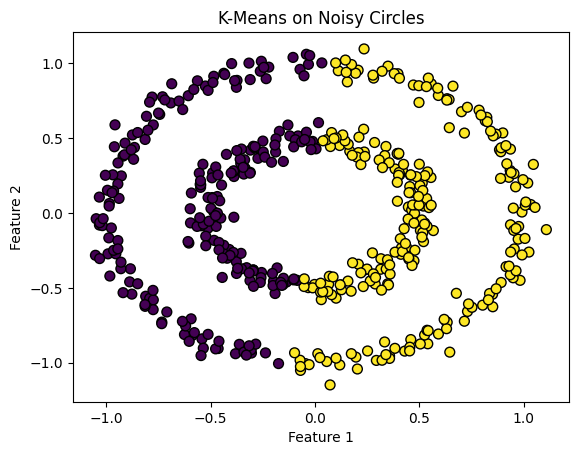

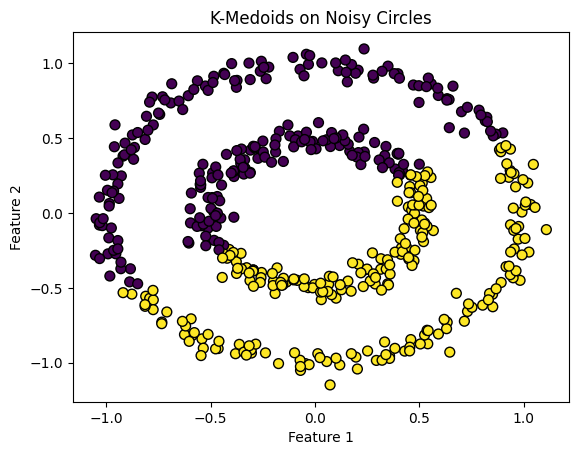

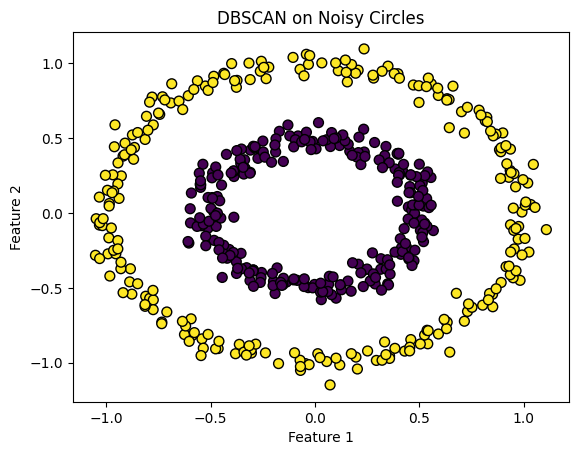

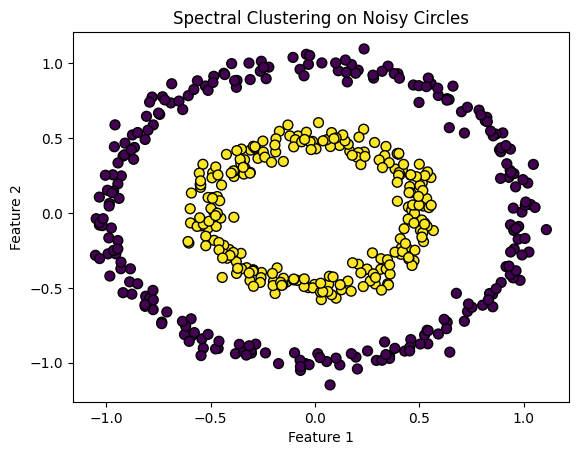

In [178]:
# Noisy Circles
kmean_op(noisy_circles[0], 2, "Noisy Circles", "K-Means")
kmedoids_op(noisy_circles[0], 2, "Noisy Circles", "K-Medoids")
dbscan_op(noisy_circles[0], 0.2, 5, "Noisy Circles", "DBSCAN")
spectral_clustering_op(noisy_circles[0], 2, "Noisy Circles", "Spectral Clustering")

### Noisy Moons

Similar to the last scenario, the K-meanss and K-Medoids models failed trying to cluster non-linear distributed data.
DBSCAN and spectral clustering did a really good job, something normal taking knowing that for this models is way easier to handle non-circular clusters  in different shapes.  

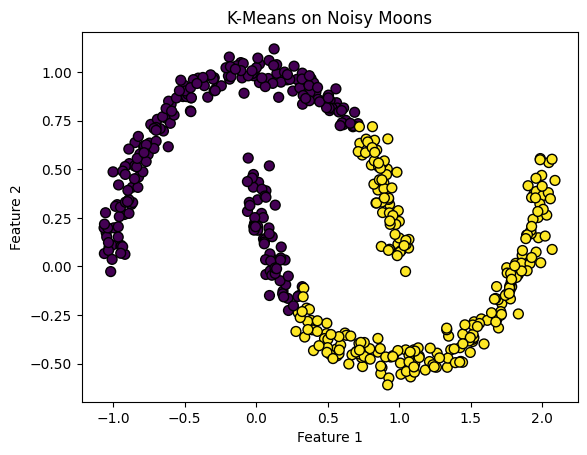

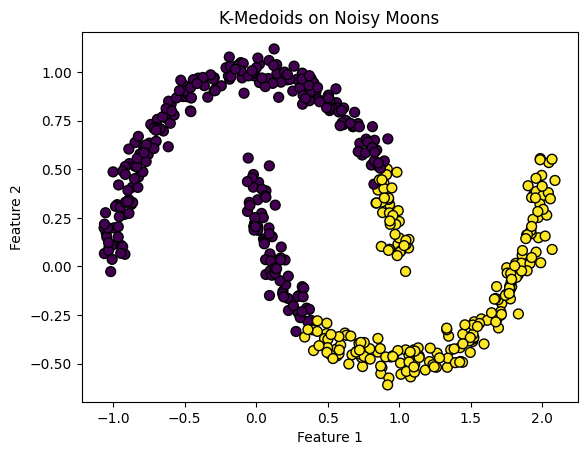

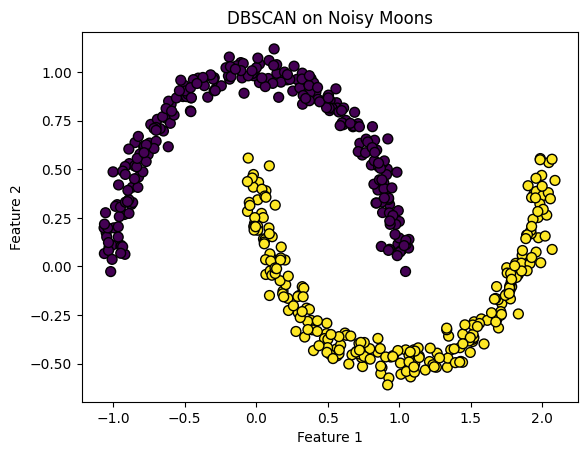

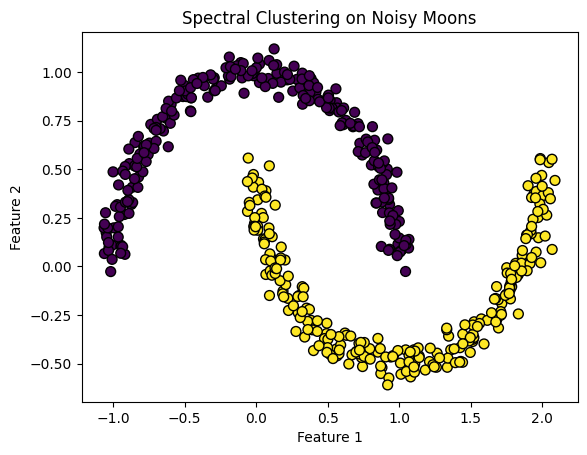

In [179]:
# Noisy Moons
kmean_op(noisy_moons[0], 2, "Noisy Moons", "K-Means")
kmedoids_op(noisy_moons[0], 2, "Noisy Moons", "K-Medoids")
dbscan_op(noisy_moons[0], 0.2, 5, "Noisy Moons", "DBSCAN")
spectral_clustering_op(noisy_moons[0], 2, "Noisy Moons", "Spectral Clustering")

### Blobs

Here there is a difference. 

K-means, K-medoids and Spectral Clustering did a good job, but DBSCAN needs an adjustment of hyperparameters to get close to the other models' results.

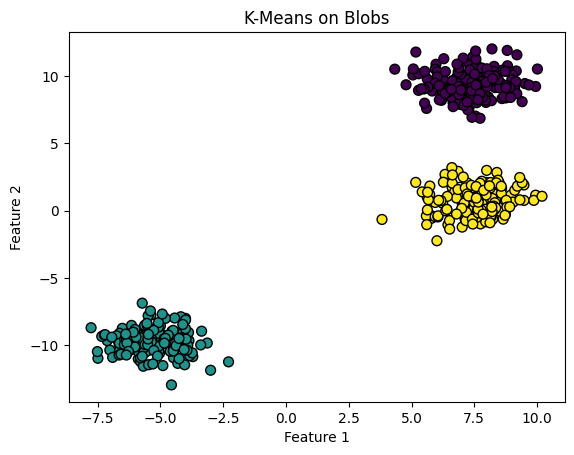

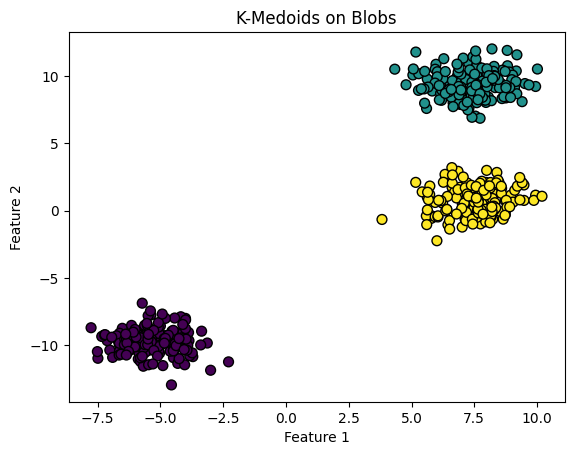

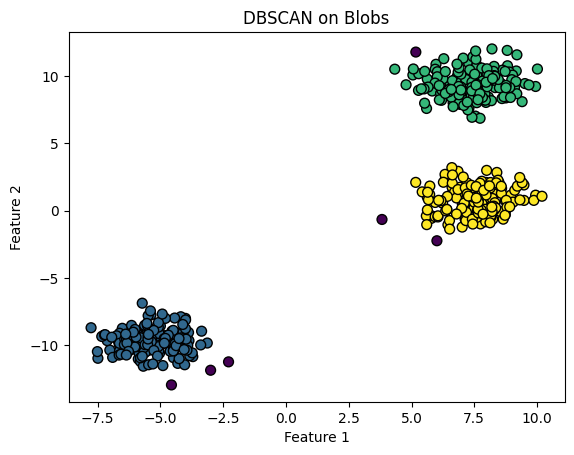

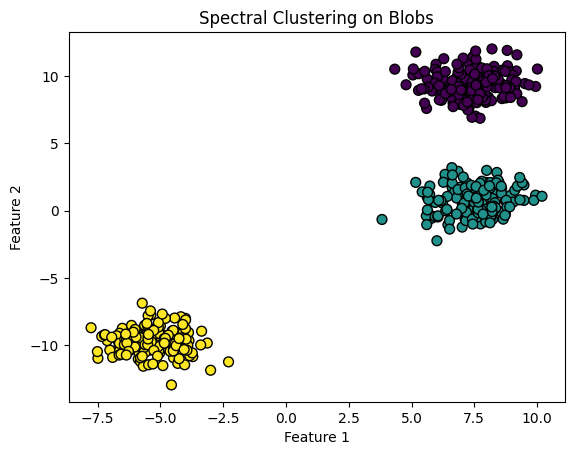

In [180]:
# Blobs
kmean_op(blobs[0], 3, "Blobs", "K-Means")
kmedoids_op(blobs[0], 3, "Blobs", "K-Medoids")
dbscan_op(blobs[0], 1, 5, "Blobs", "DBSCAN")
spectral_clustering_op(blobs[0], 3, "Blobs", "Spectral Clustering")

### No Structure

This was the trickiest one, because almost all the models depend on the number of clusters assigned, if I put a number different than 1, the  model will struggle finding an answer. 

Only DBSCAN is able to get the result correctly without indicating it the number of clusters and in this particular case, it was able to detect that there where no clusters. 

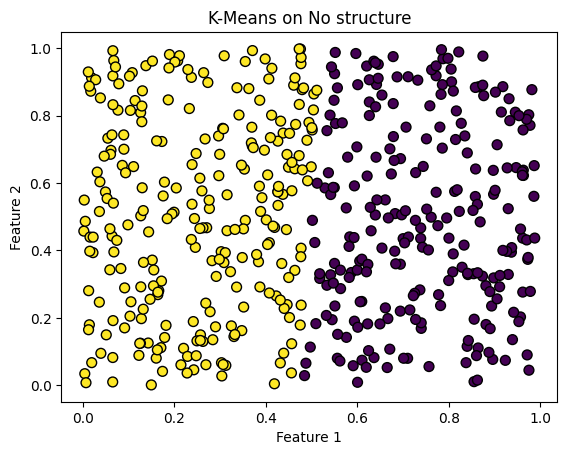

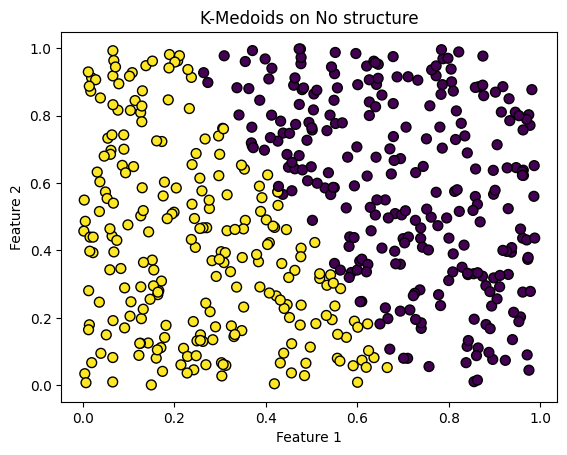

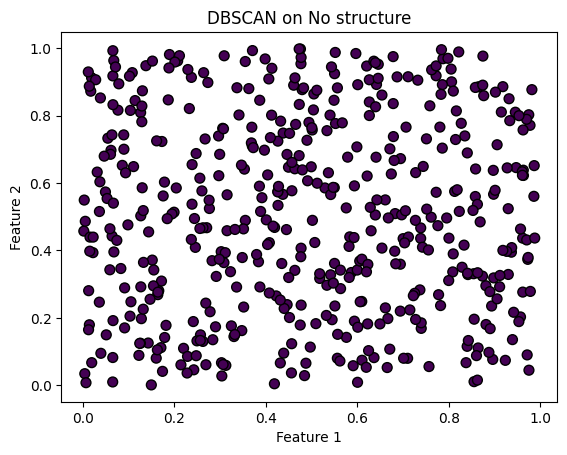

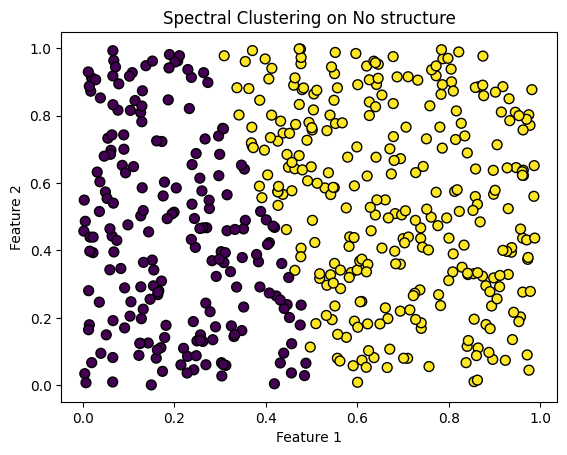

In [185]:
# No Structure
kmean_op(no_structure[0], 2, "No structure", "K-Means")
kmedoids_op(no_structure[0], 2, "No structure", "K-Medoids")
dbscan_op(no_structure[0], 0.2, 5, "No structure", "DBSCAN")
spectral_clustering_op(no_structure[0], 2, "No structure", "Spectral Clustering")

### Anisotropicly Distributed Data

Again, the models like K-Means and K-Medoids did a terrible job because of their nature. 

DBSCAN needed an adjustment in its parameters and got something acceptable, but Spectral Clustering got a really good approach. 

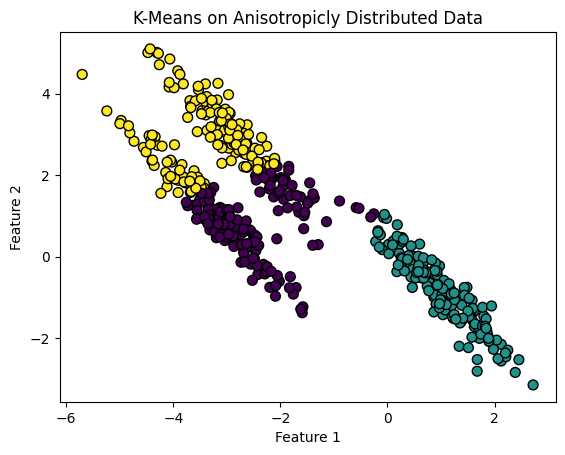

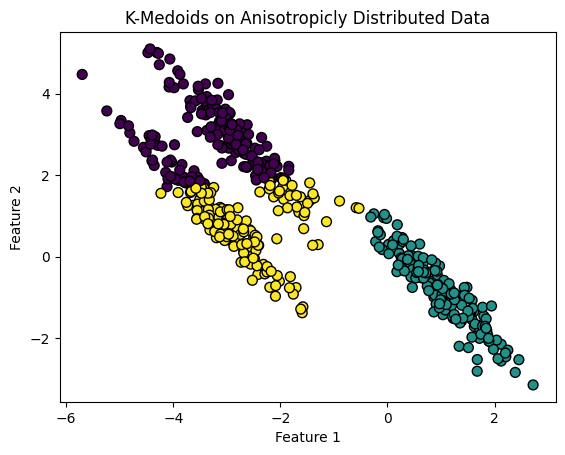

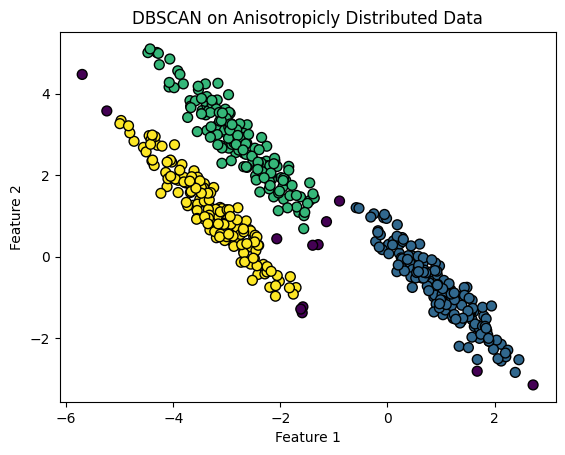

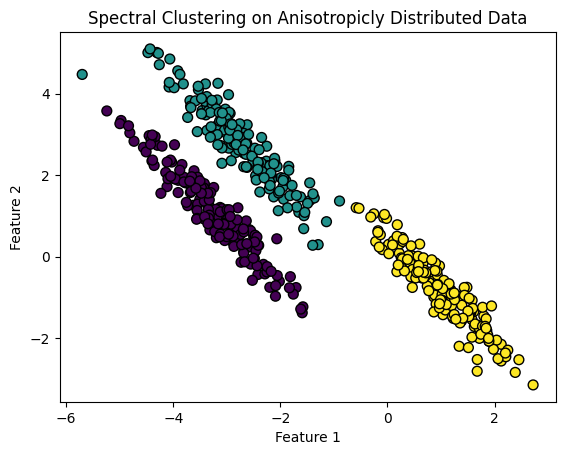

In [182]:
# Anisotropicly Distributed Data
kmean_op(aniso[0], 3, "Anisotropicly Distributed Data", "K-Means")
kmedoids_op(aniso[0], 3, "Anisotropicly Distributed Data", "K-Medoids")
dbscan_op(aniso[0], 0.35, 4, "Anisotropicly Distributed Data", "DBSCAN")
spectral_clustering_op(aniso[0], 3, "Anisotropicly Distributed Data", "Spectral Clustering")

### Blobs with Varied Variances
K-Mean and K-Medoids are limited for this kind of data, BUT got relatively good appproximations. 

Spectral Clustering got really close and DBSCAN too, but the latter without needing the number of clusters (although it needed some parameters adjustments)

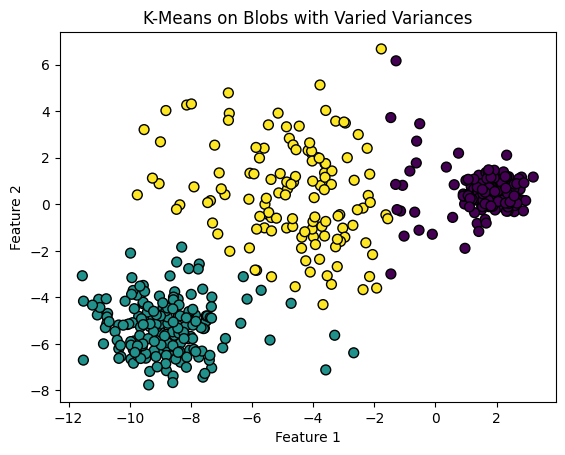

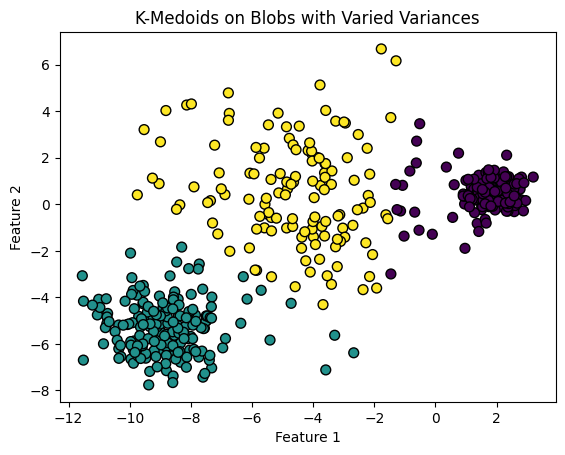

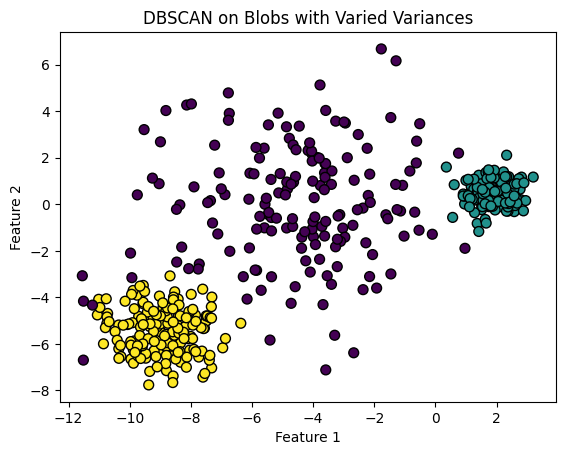

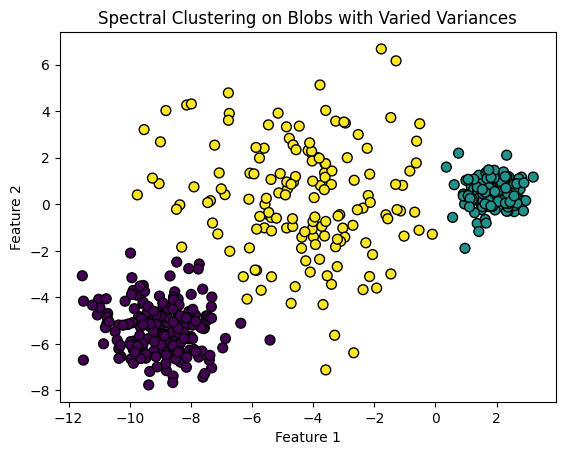

In [187]:
# Blobs with Varied Variances
kmean_op(varied[0], 3, "Blobs with Varied Variances", "K-Means")
kmedoids_op(varied[0], 3, "Blobs with Varied Variances", "K-Medoids")
dbscan_op(varied[0], 1, 20, "Blobs with Varied Variances", "DBSCAN")
spectral_clustering_op(varied[0], 3, "Blobs with Varied Variances", "Spectral Clustering")

# Conclusion 

While some models have been analyzed qualitatively, the derived insights urge us to exercise caution with the data and the models we select for analysis. Models like Spectral Clustering and DBSCAN hold distinct advantages due to their capacity to identify clusters of varying shapes, and in DBSCAN's case, to operate without predefining the number of clusters. However, models such as K-Means and K-Medoids remain invaluable tools, often serving as the go-to options for data analysis. These models, despite their simplicity, can provide powerful insights, especially in scenarios where the data adheres to their underlying assumptions. Therefore, understanding the specific attributes and requirements of each model is crucial in leveraging their strengths effectively for data analysis.

# Bibliography

Von Luxburg, U. (2007). *A tutorial on spectral clustering.* Statistics and computing, 17, 395-416.

Aoullay, A. (2018). *Spectral Clustering for beginners.* Towards Data Science, Retrieved February 19, 2024 from [Medium](https://towardsdatascience.com/spectral-clustering-for-beginners-d08b7d25b4d8)

DataScientest (2022). *Machine Learning & Clustering: el algoritmo DBSCAN.* Retrieved February 19, 2024 from [datascientest.com](https://https://datascientest.com/es/machine-learning-clustering-dbscan)

Wikipedia contributors. (2023, November 15). DBSCAN. In Wikipedia, The Free Encyclopedia. Retrieved February 21, 2024, from [Wiki](https://en.wikipedia.org/w/index.php?title=DBSCAN&oldid=1185206201)

Schubert, E. (2023). Stop using the elbow criterion for k-means and how to choose the number of clusters instead. ACM SIGKDD Explorations Newsletter, 25(1), 36-42.





